In [4]:
# Code practise for coursera 
#《 Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning》

# The Hello World of Deep Learning with Neural Networks

# Step 1: Imports libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Step 2: Define and Compile the Neural Network

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

# Step 3: provide the data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Step 4: train the network
model.fit(xs, ys, epochs=500)

# Step 5: make prediction on new data
print(model.predict([10.0]))
# [[18.984325]] pattern: y = 2x - 1

Epoch 1/1
6/6 [==============================] - 0s 21ms/step - loss: 13.9289
[[2.7125444]]


In [6]:
# House price exercise
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) 
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.00, 1.50, 2.00, 2.50, 3.00, 3.50])
model.fit(xs, ys, epochs=100)
print(model.predict([7.0]))

Epoch 1/100
6/6 [==============================] - 0s 31ms/step - loss: 10.0301
Epoch 2/100
6/6 [==============================] - 0s 0us/step - loss: 4.6527
Epoch 3/100
6/6 [==============================] - 0s 333us/step - loss: 2.1638
Epoch 4/100
6/6 [==============================] - 0s 333us/step - loss: 1.0117
Epoch 5/100
6/6 [==============================] - 0s 667us/step - loss: 0.4785
Epoch 6/100
6/6 [==============================] - 0s 332us/step - loss: 0.2316
Epoch 7/100
6/6 [==============================] - 0s 668us/step - loss: 0.1173
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 9/100
6/6 [==============================] - 0s 499us/step - loss: 0.0397
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 11/100
6/6 [==============================] - 0s 1000us/step - loss: 0.0228
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 13/100
6/6 [==========================

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

[0.36151036648750307, 0.8686]

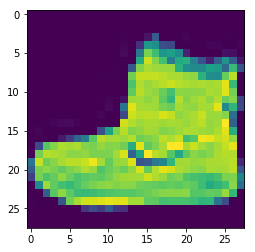

In [6]:
# A Computer Vision Example: fashine-mnist
import tensorflow as tf
import matplotlib.pyplot as plt

#print(tf.__version__)

# adding callback function to decide when to stop training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# get dataset
mnist = tf.keras.datasets.fashion_mnist
# seperate dataset to training and test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# test first image value and label
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

# all of the values in the number are between 0 and 255. 
#If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, 
# a process called 'normalizing'
training_images  = training_images / 255.0
test_images = test_images / 255.0

# design the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
# compile the model
model.compile(optimizer = "adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# test the model on new images
model.evaluate(test_images, test_labels)


In [5]:
# Exercise on mnist dataset

# YOUR CODE SHOULD START HERE
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

model.evaluate(x_test, y_test)


# YOUR CODE SHOULD END HERE

Epoch 1/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.2002 - acc: 0.9408
Epoch 2/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0807 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0530 - acc: 0.9834
Epoch 4/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0381 - acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0276 - acc: 0.9909

Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 85us/step


[0.07144459963876289, 0.978]